In [1]:
!pip install git+https://github.com/librosa/librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/librosa/librosa to /tmp/pip-req-build-pz4yjmtj
  Running command git clone -q https://github.com/librosa/librosa /tmp/pip-req-build-pz4yjmtj
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
import librosa

y, sr = librosa.load( librosa.example('robin'))

In [3]:
import numpy as np

S = librosa.feature.melspectrogram(y=y, sr=sr, power=1) # メルスペクトルの算出
log_S = librosa.amplitude_to_db(S+1e-6, ref=np.max)          # 対数メルスペクトルへ変換
pcen_S = librosa.pcen(S*(2**31), sr=sr)                   # PCENの算出

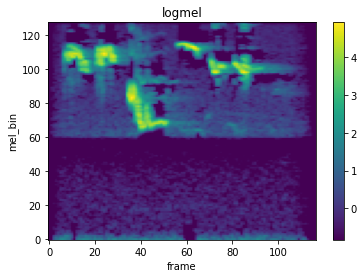

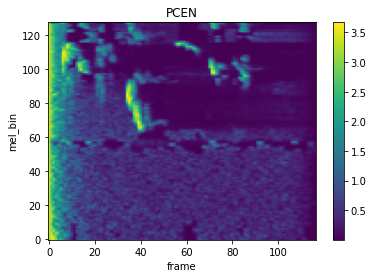

In [4]:
import matplotlib.pyplot as plt

# 表示用関数
def plot_spectrogram(spec, title=None, ylabel="mel_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(spec, origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


plot_spectrogram((log_S-log_S.mean())/log_S.std(), title='logmel')

plot_spectrogram(pcen_S, title='PCEN')